In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size= 14)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style= "white", color_codes = True)
import time

In [37]:
Data = pd.read_csv('C:\\Users\\Meygol\\OneDrive\\Desktop\\milknew.csv')

In [3]:
Data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
Data.dropna()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [23]:
Data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
Temprature,1059.000000,44.226629,10.098364,34.000000,38.000000,41.000000,45.000000,90.000000
pH,1059.000000,6.630123,1.399679,3.000000,6.500000,6.700000,6.800000,9.500000
Colour,1059.000000,5.979226,2.734908,0.000000,5.000000,8.000000,8.000000,8.000000
Fat,1059.000000,0.671388,0.469930,0.000000,0.000000,1.000000,1.000000,1.000000
Taste,1059.000000,0.546742,0.498046,0.000000,0.000000,1.000000,1.000000,1.000000
Turbidity,1059.000000,0.491029,0.500156,0.000000,0.000000,0.000000,1.000000,1.000000
Odor,1059.000000,0.432483,0.495655,0.000000,0.000000,0.000000,1.000000,1.000000


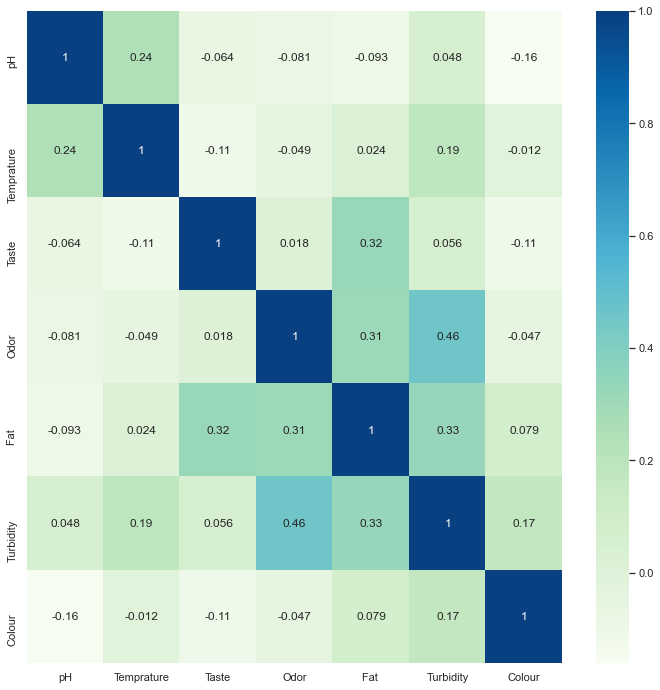

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap(Data.corr(),annot = True,cmap = 'GnBu')

In [5]:
df_1 = pd.DataFrame(Data)

In [6]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_1['Colour']))}

class_mapping

{240: 0, 245: 1, 246: 2, 247: 3, 248: 4, 250: 5, 253: 6, 254: 7, 255: 8}

In [7]:
df_1['Colour'] = df_1['Colour'].map(class_mapping)

In [8]:
df_1

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,7,high
1,6.6,36,0,1,0,1,6,high
2,8.5,70,1,1,1,1,2,low
3,9.5,34,1,1,0,1,8,low
4,6.6,37,0,0,0,0,8,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,3,medium
1055,6.7,38,1,0,1,0,8,high
1056,3.0,40,1,1,1,1,8,low
1057,6.8,43,1,0,1,0,5,high


In [9]:
X = Data.values[:, 0:7]
y = Data.values[:, 7]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [12]:
X_train_norm

array([[0.55384615, 0.16071429, 0.        , ..., 1.        , 0.        ,
        0.625     ],
       [0.53846154, 0.07142857, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.55384615, 0.05357143, 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.26153846, 0.07142857, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.92307692, 0.16071429, 1.        , ..., 1.        , 1.        ,
        0.625     ],
       [0.53846154, 0.07142857, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [13]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [14]:
X_train_std

array([[-0.01122953, -0.1179238 , -1.08012345, ...,  0.72435582,
        -0.95641449, -0.3732337 ],
       [-0.08057188, -0.6077306 ,  0.9258201 , ..., -1.38053698,
        -0.95641449,  0.73155793],
       [-0.01122953, -0.70569196,  0.9258201 , ...,  0.72435582,
         1.04557178,  0.73155793],
       ...,
       [-1.32873411, -0.6077306 ,  0.9258201 , ...,  0.72435582,
        -0.95641449,  0.73155793],
       [ 1.65298678, -0.1179238 ,  0.9258201 , ...,  0.72435582,
         1.04557178, -0.3732337 ],
       [-0.08057188, -0.6077306 ,  0.9258201 , ..., -1.38053698,
        -0.95641449,  0.73155793]])

# #comparing Models' Accuracy and Taken Time

In [42]:
models = [KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(),
         DecisionTreeClassifier()]

In [43]:
Name = []
Accuracy = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train_std,y_train)
    prediction = model.predict(X_test_std)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)

In [44]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Time Taken
0,KNeighborsClassifier,0.984277,0.124441
1,LogisticRegression,0.830189,0.238469
2,RandomForestClassifier,0.987421,0.890924
3,DecisionTreeClassifier,0.987421,0.003076


# #Finding the best number of neighbors for KNN Algorithm

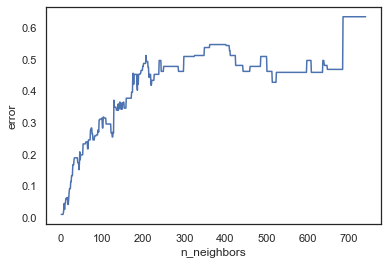

In [15]:
import numpy as np
import pandas as pd
X_train
y_train
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range (1,742):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    error.append(np.mean(ypred!=y_test))
import matplotlib.pyplot as plt
plt.plot(range(1,742),error)
plt.xlabel("n_neighbors")
plt.ylabel("error")
plt.show()

In [16]:
import numpy as np
import pandas as pd
X_train
y_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
df_3 = pd.DataFrame({"y_test" : y_test , "ypred" : ypred})

In [56]:
df_3

,y_test,ypred
0,high,high
1,low,low
2,medium,medium
3,low,low
4,high,high
...,...,...
313,low,low
314,high,high
315,low,low
316,high,high


In [21]:
from sklearn.metrics import classification_report
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n        high       1.00      1.00      1.00        86\n         low       1.00      0.97      0.99       116\n      medium       0.97      1.00      0.99       116\n\n    accuracy                           0.99       318\n   macro avg       0.99      0.99      0.99       318\nweighted avg       0.99      0.99      0.99       318\n'

# #Decision Tree Algorithm

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
df_2 = pd.DataFrame({"y_test" : y_test , "ypred" : ypred})

In [66]:
df_2

,y_test,ypred
0,high,high
1,low,low
2,medium,medium
3,low,low
4,high,high
...,...,...
313,low,low
314,high,high
315,low,low
316,high,high


In [67]:
from sklearn.metrics import classification_report
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n        high       0.98      0.99      0.98        86\n         low       1.00      0.97      0.99       116\n      medium       0.98      1.00      0.99       116\n\n    accuracy                           0.99       318\n   macro avg       0.99      0.99      0.99       318\nweighted avg       0.99      0.99      0.99       318\n'

# Random Forest Algorithm

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
df_5 = pd.DataFrame({"y_test" : y_test , "ypred" : ypred})

In [69]:
from sklearn.metrics import classification_report
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n        high       0.98      0.99      0.98        86\n         low       1.00      0.97      0.99       116\n      medium       0.98      1.00      0.99       116\n\n    accuracy                           0.99       318\n   macro avg       0.99      0.99      0.99       318\nweighted avg       0.99      0.99      0.99       318\n'